In [35]:
from IPython.display import Image
import numpy as np
import os
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
diabetes = pd.read_csv("dataset_diabetes/diabetic_data.csv")
print("Shape of data is " + str(diabetes.shape))

Shape of data is (101766, 50)


In [36]:
diabetes.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
77234,234231672,64460970,Caucasian,Female,[80-90),?,1,3,7,5,MC,?,52,0,10,0,0,0,486,427,250,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
27829,91143762,4673376,Caucasian,Male,[30-40),?,1,1,7,2,HM,InternalMedicine,34,0,9,0,0,0,786,250,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
2694,17270364,54955620,Caucasian,Female,[40-50),[75-100),6,1,17,3,?,Cardiology,73,4,19,0,0,0,592,250,346,4,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
1589,10743150,19908252,Caucasian,Female,[80-90),?,6,6,7,2,?,InternalMedicine,43,0,8,0,0,0,250.82,E932,401,5,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
67924,191141346,37719063,Other,Female,[30-40),?,2,1,7,2,OG,Emergency/Trauma,80,0,8,0,0,0,250,590,280,3,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
86453,274889100,58230873,Caucasian,Male,[40-50),?,1,1,7,5,OG,?,29,1,14,0,0,3,250.8,682,707,5,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
48114,147216216,59102316,AfricanAmerican,Female,[60-70),?,3,1,1,3,MD,ObstetricsandGynecology,32,3,17,0,0,0,182,401,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
45426,140421762,58663629,?,Male,[80-90),?,1,3,7,6,MC,?,54,1,8,0,0,0,851,250,342,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
8103,37268736,102027636,Caucasian,Female,[80-90),[50-75),6,3,17,4,?,?,50,0,16,1,0,1,786,403,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
84476,266235552,92298033,Caucasian,Female,[50-60),?,1,1,7,1,MC,?,4,0,12,0,0,0,411,401,272,6,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


Number of missing values in different columns


<AxesSubplot:>

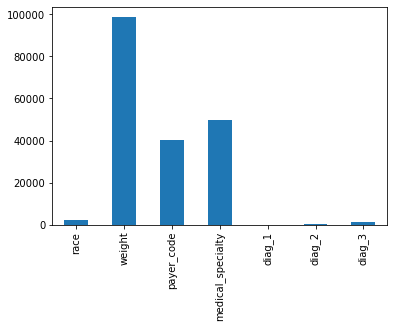

In [37]:
missing_num = np.sum(diabetes == "?",axis =0)
num_diabetes_data_entries = diabetes.shape[0]
print("Number of missing values in different columns")
missing_num[missing_num[:] > 0]
missing_num[missing_num[:] > 0].plot.bar()

<BarContainer object of 3 artists>

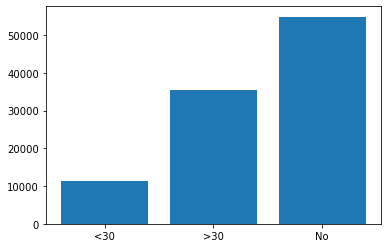

In [38]:
import matplotlib.pyplot as plt
plt.bar(['<30', '>30', 'No'],[np.sum(diabetes['readmitted'] == "<30"),
np.sum(diabetes['readmitted'] == ">30"),
np.sum(diabetes['readmitted'] == "NO")])

In [39]:
#diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [40]:
# imputer for filling missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = '?', fill_value = np.nan, strategy = 'constant')

In [41]:
# replace ? with NaN
diabetes.replace('?', np.NaN, inplace=True)

In [42]:
diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [43]:
# drop rows with missing values
diabetes.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [44]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [45]:
# convert string to categorical
diabetes_string_col=['race', 'gender', 'age','max_glu_serum', 
                     'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'diag_1', 'diag_2', 'diag_3',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [46]:
for i in diabetes_string_col:
    diabetes[i]= diabetes[i].astype('category')

In [47]:
diabetes['race']

1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
5               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 98053, dtype: category
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

In [48]:
y = diabetes['readmitted'] 

In [49]:
diabetes
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
diabetes = pd.DataFrame(diabetes)


for i in diabetes_string_col:
    dummies = pd.get_dummies(diabetes[i], prefix=i)
    diabetes = diabetes.join(dummies)
#     enc_df = (enc.fit_transform(diabetes[i].reshape(diabetes[i].shape[0], 1)).toarray())
#     print(enc_df)
for i in diabetes_string_col:
    diabetes = diabetes.drop(i, axis=1)


In [50]:
y=diabetes['readmitted']
x=diabetes.drop(columns=['readmitted','encounter_id','patient_nbr']) # drop the patiant id
import pandas as pd

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [52]:
X_train.shape

(68637, 2350)

In [53]:
X_test.shape

(14708, 2350)

## Random Forest

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
test_accuracy = []
training_accuracy = []


clfs = []
depths = [1, 5, 100, 250, 300]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    training_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
import matplotlib.pyplot as plt


KeyboardInterrupt: 

In [ ]:
plt.loglog(depths, test_accuracy, c='b')
plt.loglog(depths, training_accuracy, c='r')

In [ ]:
import seaborn as sns
feature_imp = pd.Series(clfs[3].feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('Feature Importance')
plt.title('Most Important Features according to Random Forest')

## PCA

In [62]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)
pca = PCA(n_components = 200)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
def scale_pca(data):
    return pca.transform(scaler.transform(data))

## PCA + Random Forest

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
pca_training_accuracy = []
pca_test_accuracy = []

pca_rf_clfs = []
depths = [1, 5, 20, 50, 100, 250, 300]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(data_pca, y_train)
    pca_rf_clfs.append(clf)
    pca_training_accuracy.append(accuracy_score(y_train, clf.predict(data_pca)))
    pca_test_accuracy.append(accuracy_score(y_test, clf.predict(scale_pca(X_test))))

Random Forest with PCA


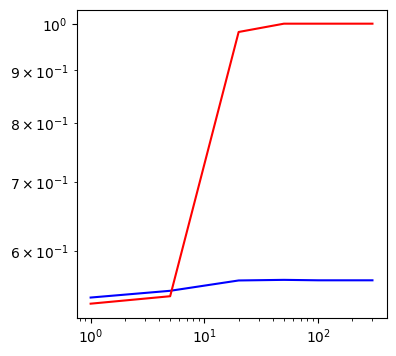

In [28]:
plt.loglog(depths, pca_test_accuracy, c='b')
plt.loglog(depths, pca_training_accuracy, c='r')
print("Random Forest with PCA")

In [29]:
pca_3d = PCA(n_components = 3)
pca_3d.fit(scaled_data)
data_pca_3d = pca_3d.transform(scaled_data)

## Show the PCA in 3D to see if we could visually classify the points

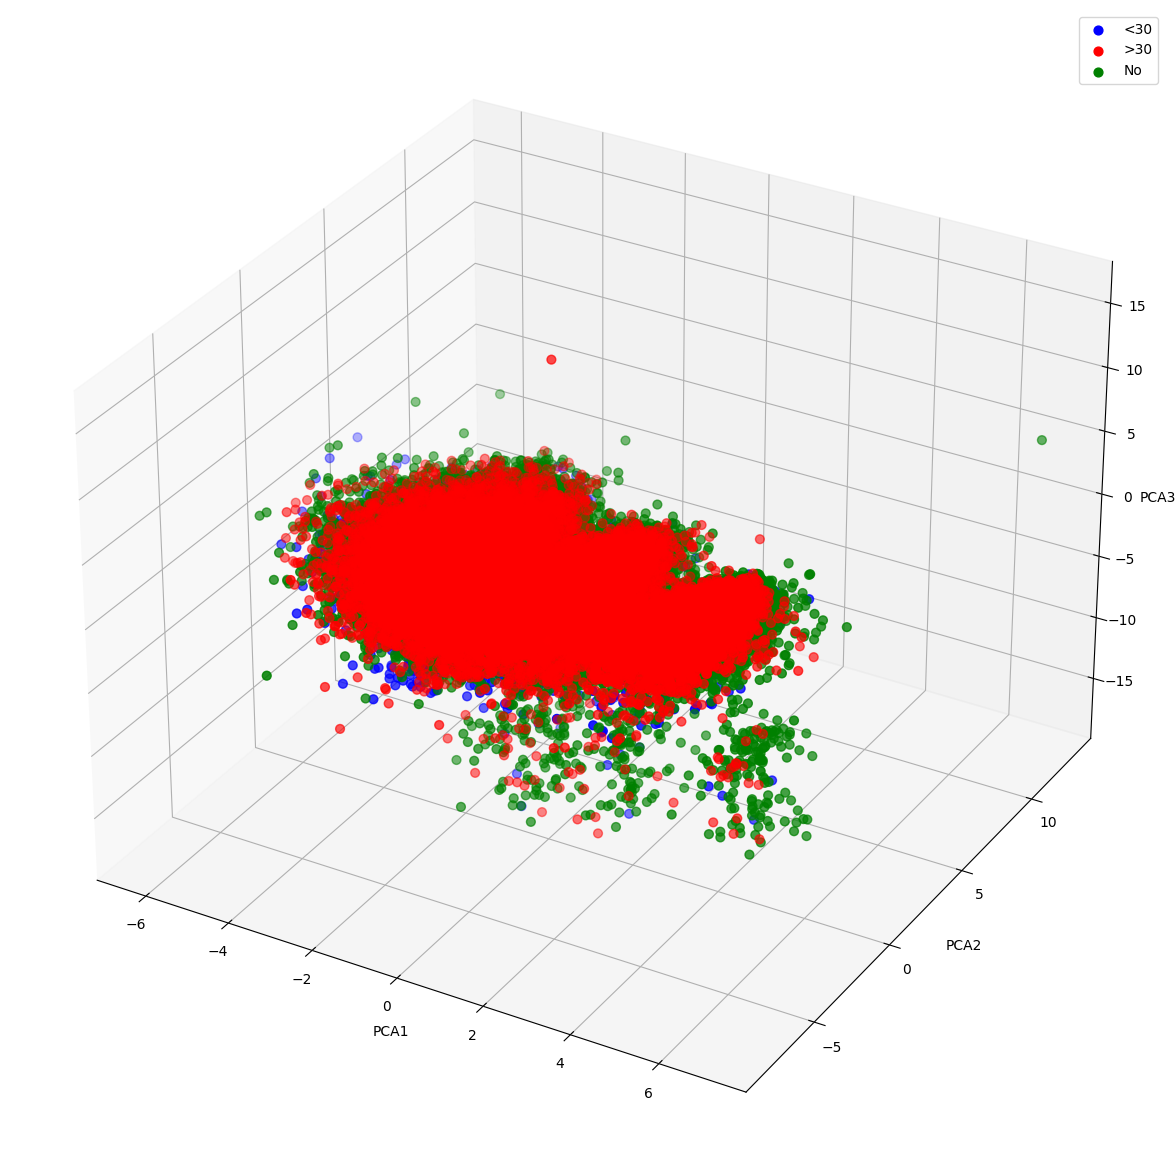

In [30]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d[y_train == '<30'][:,0], data_pca_3d[y_train == '<30'][:,1], data_pca_3d[y_train == '<30'][:,2], s = 40 , color = 'blue', label = "<30")
ax.scatter(data_pca_3d[y_train == '>30'][:,0], data_pca_3d[y_train == '>30'][:,1], data_pca_3d[y_train == '>30'][:,2], s = 40 , color = 'red', label = ">30")
ax.scatter(data_pca_3d[y_train == 'NO'][:,0], data_pca_3d[y_train == 'NO'][:,1], data_pca_3d[y_train == 'NO'][:,2], s = 40 , color = 'g', label = "No")
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

## Logistic Regression

In [31]:
from sklearn import linear_model
print("Train with PCA")
logr_pca = linear_model.LogisticRegression(solver='liblinear')
logr_pca.fit(data_pca,y_train)

Train with PCA


LogisticRegression(solver='liblinear')

In [32]:
print("Train Accuracy")
print(accuracy_score(y_train, logr_pca.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, logr_pca.predict(scale_pca(X_test))))

Train Accuracy
0.5605033018026058
Test Accuracy
0.5650400285554026


In [33]:
from sklearn import linear_model
print("Train with original data")
logr = linear_model.LogisticRegression(solver='liblinear')
logr.fit(X_train,y_train)

Train with original data


LogisticRegression(solver='liblinear')

In [34]:
print("Train Accuracy")
print(accuracy_score(y_train, logr.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, logr.predict(X_test)))

Train Accuracy
0.5856683919328931
Test Accuracy
0.5761562388455459


## Linear SVM

As SVM for original data taking too long to run, we use the 200 features PCA for SVM in the following code.

In [35]:
from sklearn import svm
svm_linear_clf = svm.LinearSVC()
svm_linear_clf.fit(data_pca, y_train)

/Users/hank/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [37]:
print("Train Accuracy")
print(accuracy_score(y_train, svm_linear_clf.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, svm_linear_clf.predict(scale_pca(X_test))))

Train Accuracy
0.5579918920986207
Test Accuracy
0.5630003569425323


## Soft Voting Ensemble


In [43]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
v = VotingClassifier(estimators=[('linear_svc', svm_linear_clf), ('logistic-regression', logr_pca), ('gnb', pca_rf_clfs[3])], voting='hard')

In [44]:
v.fit(data_pca, y_train)
print("Train Accuracy")
print(accuracy_score(y_train, v.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, v.predict(scale_pca(X_test))))

/Users/hank/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy
0.5859361056576834
Test Accuracy
0.5672326755392382


## Neural networks

In [87]:
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf


In [71]:
# Need to separate one-hot encodings and features that requires normalization

# nl = Normalizer()
# nl.fit(X_train)
# X_train = nl.transform(X_train)




In [80]:
def nn():
    inputs = Input(name='inputs', shape=[data_pca.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(3, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [81]:
model = nn()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 FC1 (Dense)                 (None, 512)               102912    
                                                                 
 BC1 (BatchNormalization)    (None, 512)               2048      
                                                                 
 Activation1 (Activation)    (None, 512)               0         
                                                                 
 Dropout1 (Dropout)          (None, 512)               0         
                                                                 
 FC2 (Dense)                 (None, 512)               262656    
                                                                 
 BC2 (BatchNormalization)    (None, 512)               2048

In [74]:
# some datas are string value, need to change to float type for loss function working
def toFloat(data):
    for row in range(len(data)):
        for col in range(len(data[0])):
            if isinstance(data[row][col], str):
                data[row][col] = tf.strings.to_number(data[row][col])
    return data

In [75]:
# pca scaling for validation data
data_train_pca = toFloat(data_pca)
data_val_pca = toFloat(scale_pca(X_val))
data_test_pca = toFloat(scale_pca(X_test))

# encode output as one hot to feed the model
def outputEncoder(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    return np_utils.to_categorical(encoded_Y)

y_train_1 = outputEncoder(y_train)
y_val_1 = outputEncoder(y_val)
y_test_1 = outputEncoder(y_test)

y_train_1[0]

array([0., 0., 1.], dtype=float32)

In [76]:
# check the casting bug
not_float = []
# for i in data_val_pca:
#     for j in i:
#         if isinstance(j, str):
#             not_float.append(j)
            
print(len(not_float))

0


In [82]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)


history = model.fit(x=data_pca, y=y_train_1, epochs=1000, validation_data=(data_val_pca, y_val_1), callbacks=[reduce_lr, early_stopping], verbose=2)


Epoch 1/1000
2145/2145 - 7s - loss: 1.0022 - accuracy: 0.5292 - val_loss: 0.9263 - val_accuracy: 0.5529 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 2/1000
2145/2145 - 7s - loss: 0.9259 - accuracy: 0.5558 - val_loss: 0.9203 - val_accuracy: 0.5578 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 3/1000
2145/2145 - 7s - loss: 0.9179 - accuracy: 0.5594 - val_loss: 0.9166 - val_accuracy: 0.5513 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 4/1000
2145/2145 - 7s - loss: 0.9121 - accuracy: 0.5652 - val_loss: 0.9142 - val_accuracy: 0.5557 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 5/1000
2145/2145 - 7s - loss: 0.9069 - accuracy: 0.5662 - val_loss: 0.9163 - val_accuracy: 0.5581 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 6/1000
2145/2145 - 7s - loss: 0.9029 - accuracy: 0.5689 - val_loss: 0.9129 - val_accuracy: 0.5585 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 7/1000
2145/2145 - 7s - loss: 0.8973 - accuracy: 0.5729 - val_loss: 0.9124 - val_accuracy: 0.5615 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 8/1000
2145/2145 - 7s

In [92]:
x_lst = [data_train_pca, data_val_pca, data_test_pca]
y_lst = [y_train_1, y_val_1, y_test_1]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = np.argmax(model.predict(x), axis=1)
    y = np.argmax(y, axis=1)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Val set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))

# y_pred = np.argmax(model.predict(data_test_pca), axis=1)
# print(accuracy_score(np.argmax(y_test_1, axis=1), y_pred))

# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(model, data_test_pca, y_test_1, cv=kfold)
# print(results)

# print()

2145/2145 [==============================] - 2s 1ms/step
Training set:
	Accuracy:0.628
	Classification Report
              precision    recall  f1-score   support

           0       0.74      0.06      0.12      7740
           1       0.58      0.44      0.50     24252
           2       0.64      0.87      0.74     36645

    accuracy                           0.63     68637
   macro avg       0.66      0.46      0.45     68637
weighted avg       0.63      0.63      0.59     68637

460/460 [==============================] - 1s 1ms/step
Val set:
	Accuracy:0.556
	Classification Report
              precision    recall  f1-score   support

           0       0.31      0.02      0.04      1678
           1       0.47      0.34      0.39      5192
           2       0.59      0.81      0.68      7838

    accuracy                           0.56     14708
   macro avg       0.45      0.39      0.37     14708
weighted avg       0.51      0.56      0.51     14708

460/460 [================